In [2]:
import pandas as pd
import tiktoken

In [3]:
df = pd.read_csv("../data/03_primary/tickets_2022.csv")

In [4]:
len(df)

703

In [5]:
text = df["Text"].iloc[0]

In [7]:
df["Text"] = df["Text"].str.replace("\n", " ")

In [8]:
enc = tiktoken.encoding_for_model("ada")

In [9]:
number_of_tokens = 0
for text in df["Text"]:
    number_of_tokens += len(enc.encode(text))
print("Average number of tokens per ticket:", number_of_tokens / len(df))

Average number of tokens per ticket: 151.28165007112375


In [10]:
number_of_tokens

106351

In [11]:
df["new"] = df["Text"].apply(lambda x: len(enc.encode(x)))

<Axes: ylabel='Frequency'>

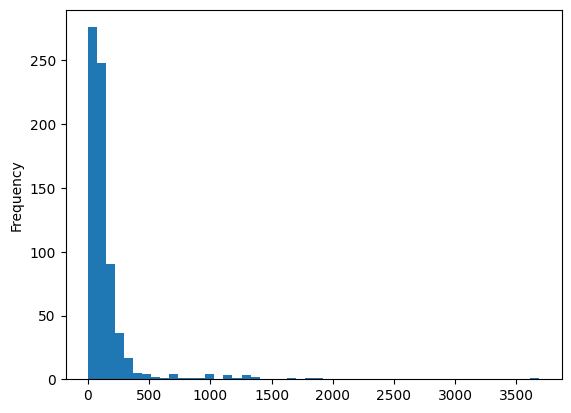

In [12]:
df["new"].plot.hist(bins=50)

In [14]:
df["new"].describe()

count     703.000000
mean      151.281650
std       247.414546
min         3.000000
25%        56.000000
50%        94.000000
75%       152.500000
max      3685.000000
Name: new, dtype: float64

In [26]:
test = "Rerum debitis a laboriosam necessitatibus delectus pariatur nihil. Numquam consequatur magni aut molestiae nam. Et et delectus recusandae aut in dicta et maiores consequatur maxime. Quae accusantium iusto fugiat odio. Mollitia sint veritatis et et quia neque magnam expedita. Accusamus praesentium voluptatem ut nemo enim sit officiis porro et reprehenderit."

len(enc.encode(enc.decode(enc.encode(test)[:10])))

10

In [33]:
df["truncated"] = df["Text"].apply(lambda x: enc.decode(enc.encode(x)[: 2048 - 9 - 1]))

<Axes: ylabel='Frequency'>

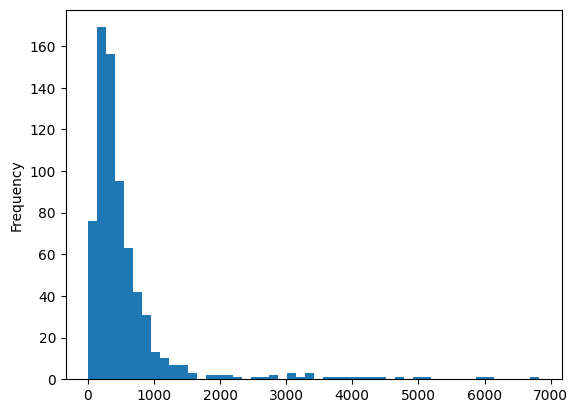

In [34]:
df["truncated"].str.len().plot.hist(bins=50)

In [43]:
text = unicodedata.normalize("NFKD", text)

In [44]:
text.replace("\n", " ")

'From: איגוד סמינרים ראיית חשבון <(><<)>igud.roch@gmail.com> Date: Friday, 2 September 2022 at 9:40 To: Malek, Nir <(><<)>nir.malek@sap.com> Cc: Holger Wittges <(><<)>holger.wittges@tum.de> Subject: Re: Moving to HEB - Seminars - Coordination Meeting Client+TUM+SAP  Good Morning, Our semester started yesterday, 1\\/9\\/22, and there are SAP classes scheduled for next week. I would be very grateful if you would help us so that we have the system immediately.  Thank you,  Nechama Zahn '